In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "STIX"
rcParams["mathtext.fontset"] = "stix"
rcParams['figure.figsize']=(35,10)
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 14
rcParams['xtick.labelsize'] = 30
rcParams['ytick.labelsize'] = 30
rcParams['legend.fontsize']=12
from pycbc.conversions import f_schwarzchild_isco,lambda_tilde,mchirp_from_mass1_mass2
import numpy as np
from scipy.interpolate import interp1d

## Figure 1 : Match Between BNS and BBH waveforms as a function of Mass and EoS

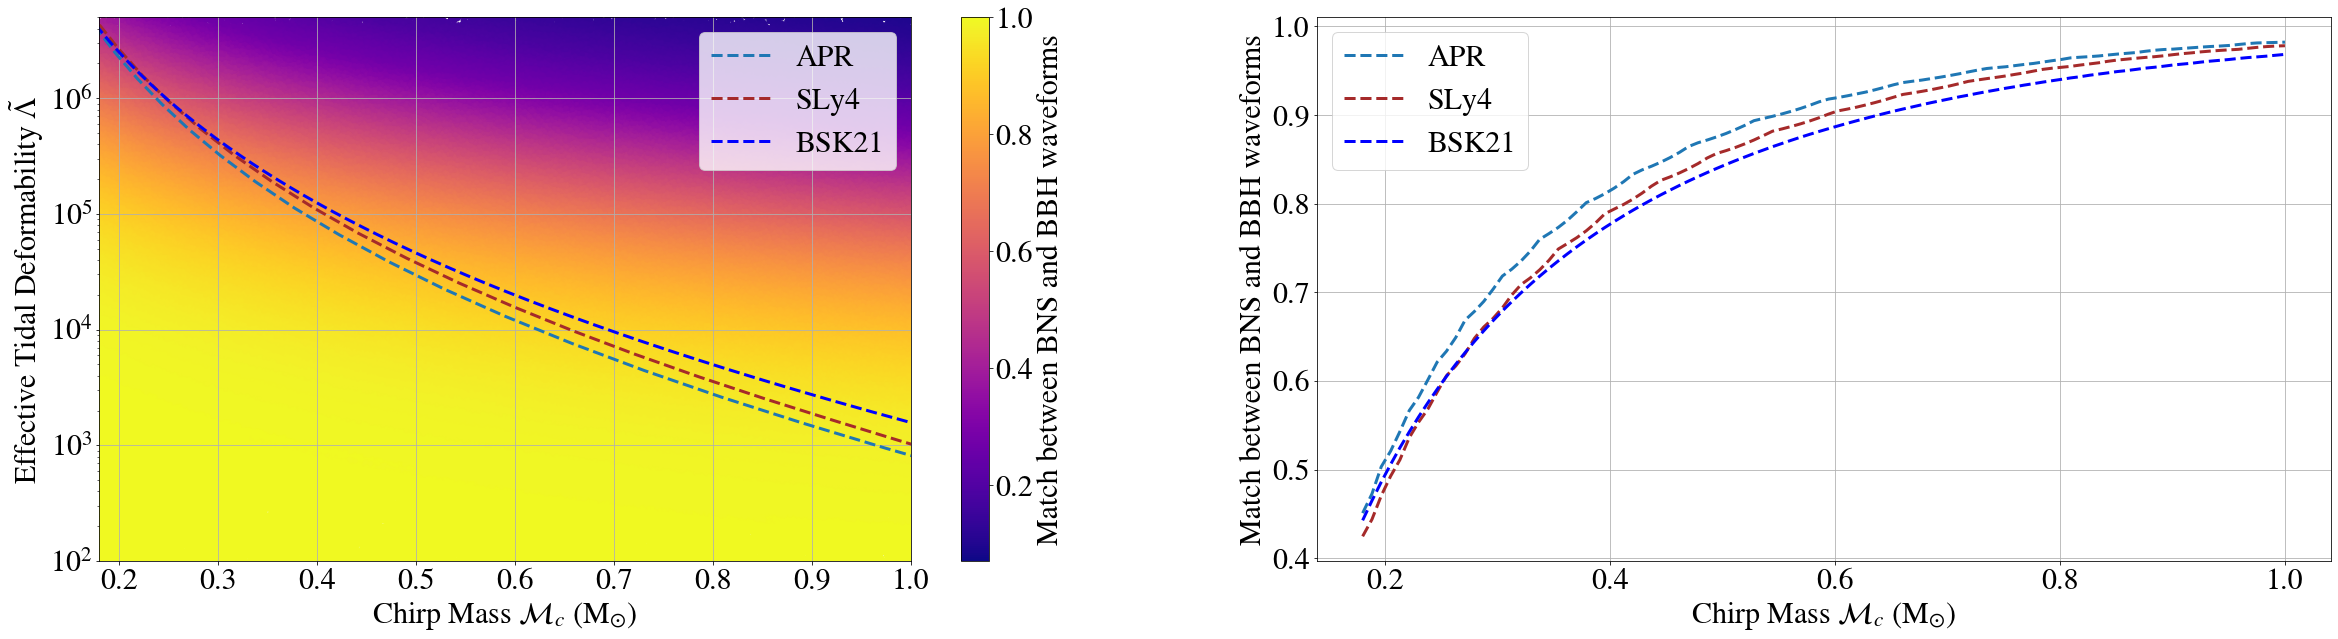

In [2]:
rcParams['figure.figsize']=(40,10)
mass,lmd,overlap = np.loadtxt('data_files/q1_isco_data.txt',unpack=True)
apr_mchirp,apr_match,_,_,_,_,_=np.loadtxt('data_files/mchirp_vs_match_APR_745320.0.txt',unpack=True)
sly_mchirp,sly_match,_,_,_,_,_=np.loadtxt('data_files/mchirp_vs_match_SLY4_745321.0.txt',unpack=True)
bsk21_mchirp,bsk21_match,_,_,_,_,_=np.loadtxt('data_files/mchirp_vs_match_BSK21_745322.0.txt',unpack=True)
m_apr,l_apr=np.loadtxt('data_files/APR-EOS.txt',unpack=True)
m_sly,l_sly=np.loadtxt('data_files/SLY-EOS.txt',unpack=True)
l_apr=lambda_tilde(m_apr,m_apr,l_apr,l_apr)
l_sly=lambda_tilde(m_sly,m_sly,l_sly,l_sly)
m_apr= mchirp_from_mass1_mass2(m_apr, m_apr)
m_sly=mchirp_from_mass1_mass2(m_sly, m_sly)

bsk_m,bsk_l = np.loadtxt('data_files/BSK21-EOS.txt',unpack=True)
bsk_mc=mchirp_from_mass1_mass2(bsk_m,bsk_m)
bsk_ltilde=lambda_tilde(bsk_m,bsk_m,bsk_l,bsk_l)
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.semilogy(m_apr,l_apr,label='APR',ls='--',linewidth=3)
ax1.semilogy(m_sly,l_sly,label='SLy4',ls='--',color='brown',linewidth=3)
ax1.semilogy(bsk_mc,bsk_ltilde,label='BSK21',ls='--',color='blue',linewidth=3)
ax1.set_xlim(0.18,1.0)
ax1.set_ylim(1e2,5e6)
ax1.grid()
ax1.set_xlabel(r'Chirp Mass $\mathcal{M}_c$ (M$_{\odot}$)',fontsize=30)
ax1.set_ylabel(r'Effective Tidal Deformability $\tilde{\Lambda}$',fontsize=30)
pcm=ax1.scatter(mass,lmd,c=overlap,s=15,cmap='plasma',vmin=0.07,vmax=1.0)
cbar=fig.colorbar(pcm,ax=ax1)
cbar.set_label('Match between BNS and BBH waveforms',fontsize=30)
ax1.legend(loc='upper right',fontsize=30)
ax2.plot(apr_mchirp,apr_match,ls='--',label='APR',linewidth=3)
ax2.plot(sly_mchirp,sly_match,ls='--',color='brown',label='SLy4',linewidth=3)
ax2.plot(bsk21_mchirp,bsk21_match,ls='--',color='blue',label='BSK21',linewidth=3)
ax2.set_xlabel(r'Chirp Mass $\mathcal{M}_c$ (M$_{\odot}$)',fontsize=30)
ax2.set_ylabel('Match between BNS and BBH waveforms',fontsize=30)
ax2.legend(loc='upper left',fontsize=30)
ax2.grid()

plt.show()
fig.savefig('./Plots/overlap_mass_lambda.png')

## Figure 3 : Roche Lobe overflow Frequencies for 3 different Equations of State

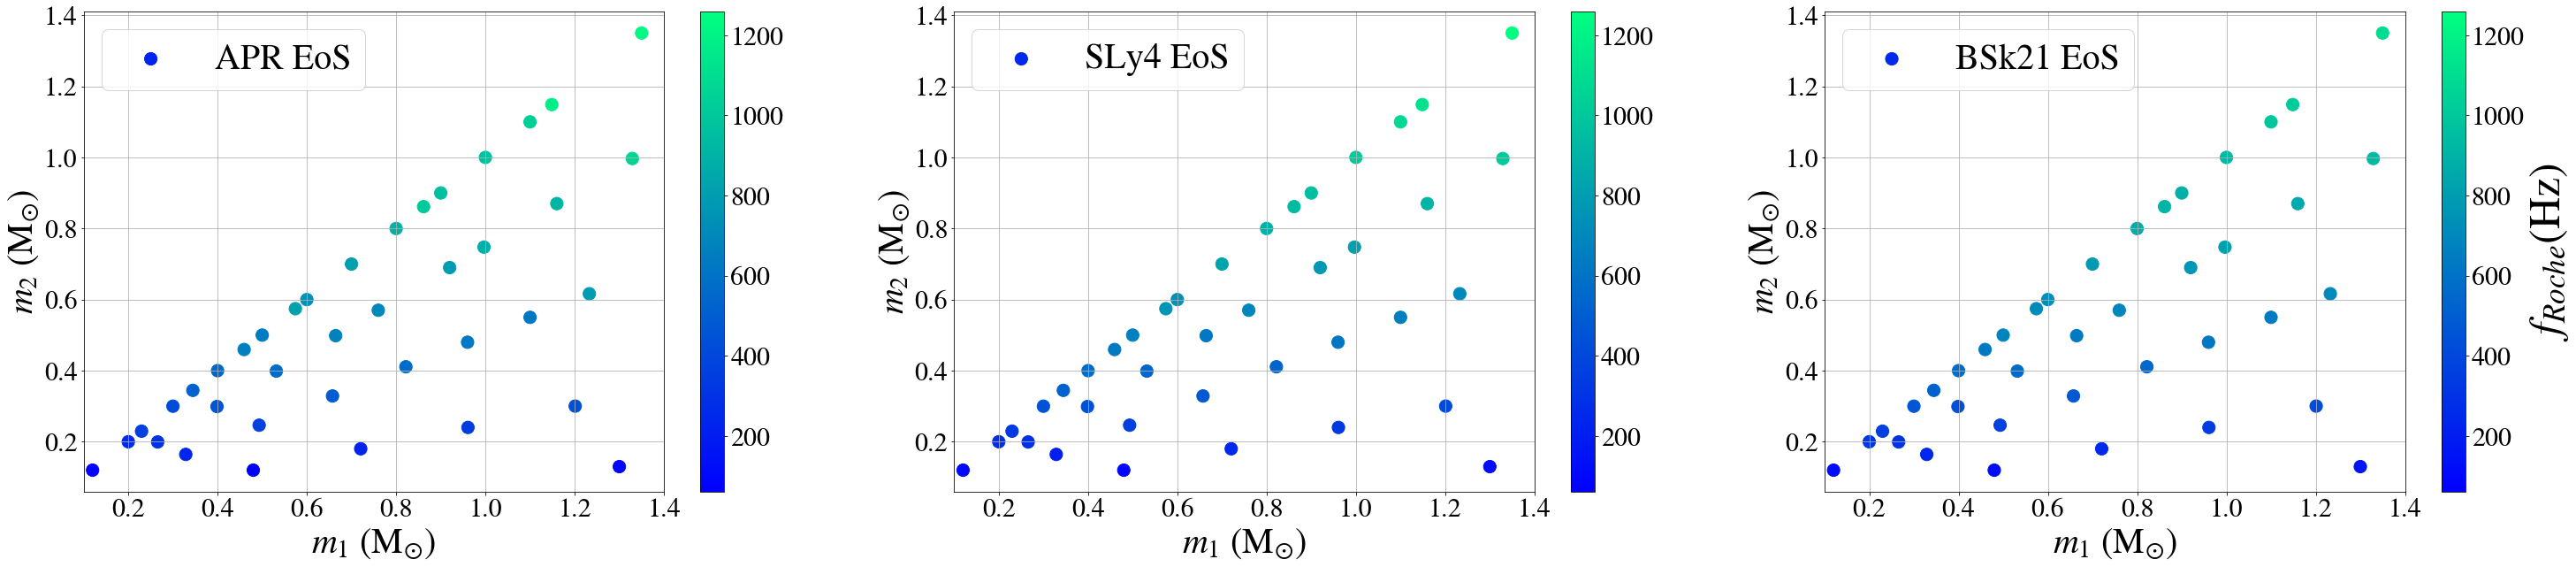

In [3]:
rcParams['figure.figsize']=(50,10)


#Reading Roche Lobe Overflow Frequencies
apr_m2,apr_m1,apr_f_orbital=np.loadtxt('data_files/APR_lorene_ISCO.txt',unpack=True)
sly_m2,sly_m1,sly_f_orbital=np.loadtxt('data_files/SLy4_lorene_ISCO.txt',unpack=True)
bsk_m2,bsk_m1,bsk_f_orbital=np.loadtxt('data_files/BSk21_lorene_ISCO.txt',unpack=True)
apr_f_orbital=2*apr_f_orbital
sly_f_orbital=2*sly_f_orbital
bsk_f_orbital=2*bsk_f_orbital

fig,(ax1,ax2,ax3)=plt.subplots(1,3)
pcm=ax1.scatter(apr_m1,apr_m2,c=apr_f_orbital,cmap='winter',s=200,vmin=60,vmax=1260,label='APR EoS')
ax1.set_xlabel(r'$m_1$ (M$_{\odot}$)',fontsize=40)
ax1.set_ylabel(r'$m_2$ (M$_{\odot}$)',fontsize=40)
ax1.legend(fontsize=40)
ax1.set_xlim(0.1,1.4)
cbar=fig.colorbar(pcm,ax=ax1)
ax1.grid()

pcm=ax2.scatter(sly_m1,sly_m2,c=sly_f_orbital,cmap='winter',s=200,vmin=60,vmax=1260,label='SLy4 EoS')
cbar=fig.colorbar(pcm,ax=ax2)
ax2.set_xlabel(r'$m_1$ (M$_{\odot}$)',fontsize=40)
ax2.set_ylabel(r'$m_2$ (M$_{\odot}$)',fontsize=40)
ax2.set_xlim(0.1,1.4)
ax2.legend(fontsize=40)
ax2.grid()
pcm=ax3.scatter(bsk_m1,bsk_m2,c=bsk_f_orbital,cmap='winter',s=200,vmin=60,vmax=1260,label='BSk21 EoS')
ax3.set_xlabel(r'$m_1$ (M$_{\odot}$)',fontsize=40)
ax3.set_ylabel(r'$m_2$ (M$_{\odot}$)',fontsize=40)
ax3.legend(fontsize=40)
ax3.set_xlim(0.1,1.4)
ax3.grid()
cbar=fig.colorbar(pcm,ax=ax3)
cbar.set_label('$f_{Roche}$(Hz)',fontsize=50)
plt.show()
fig.savefig('./Plots/Roche_Lobe_Overflow_Frequencies.png')

## Figure 4 : Checking Efficacy of Template Bank

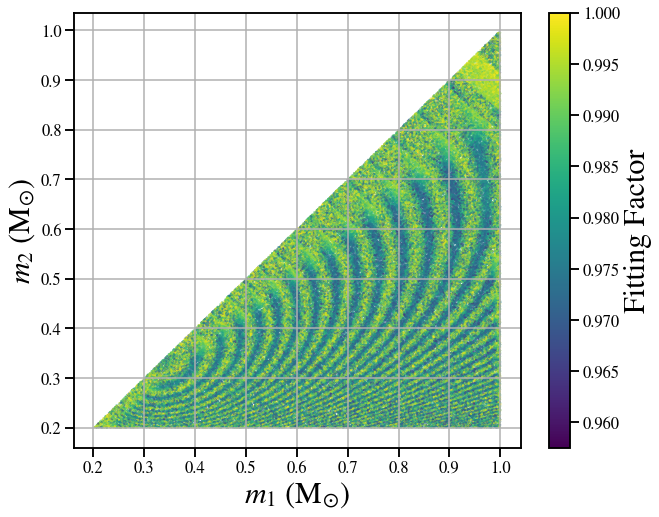

In [4]:
import seaborn as sns
sns.set_context('talk')
#Reading Template Bank Simulation Data
mass1, mass2,lmd1,lmd2,sim_mass1,sim_mass2,best_match,same_mass_match,f_isco = np.loadtxt('data_files/banksims_bbh.txt',unpack=True)

#Plotting Figure 4 from paper
rcParams['figure.figsize']=(10,8)
fig=plt.figure()
plt.scatter(mass1,mass2,c=best_match,s=0.1,cmap='viridis')
cbar=plt.colorbar()
cbar.set_label('Fitting Factor',fontsize=30)
plt.xlabel(r'$m_1$ (M$_{\odot}$)',fontsize=30)
plt.ylabel(r'$m_2$ (M$_{\odot}$)',fontsize=30)
plt.grid()
plt.show()
fig.savefig('Plots/BBH_m1m2.png')

## Figure 5 : Template Bank Simulation Plots for Injected BNS Signals

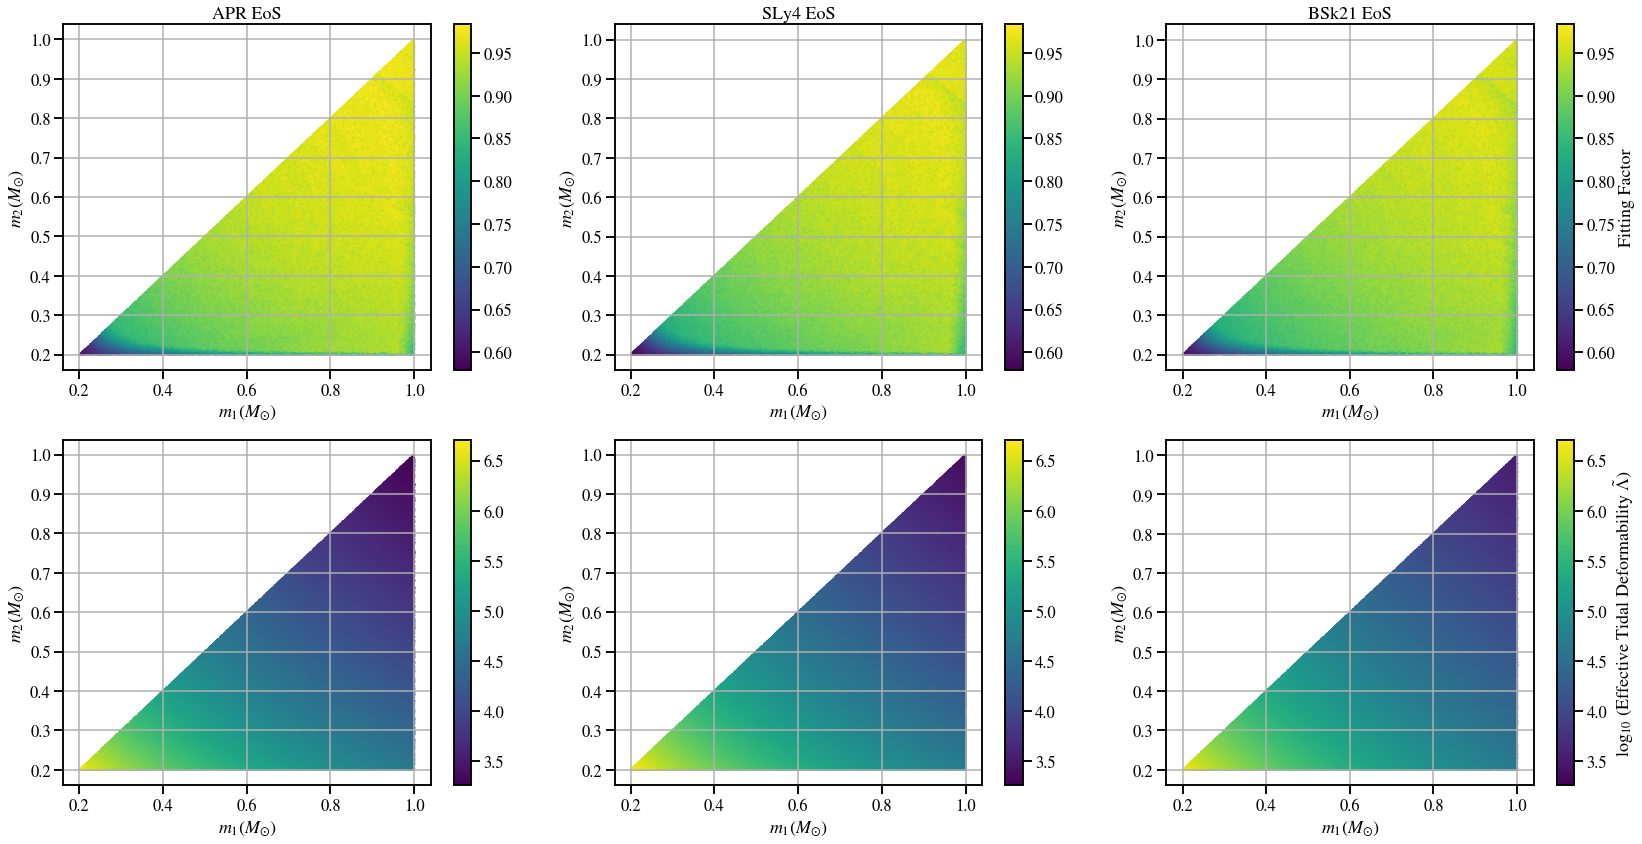

In [5]:
#Reading Template Bank Simulation Result Files
apr_mass1, apr_mass2,apr_lmd1, apr_lmd2, apr_sim_mass1,apr_sim_mass2,apr_best_match,apr_same_mass_match, apr_f_rlo = np.loadtxt('data_files/APR_bns_rlo_data.txt',unpack=True)
sly_mass1, sly_mass2,sly_lmd1, sly_lmd2, sly_sim_mass1,sly_sim_mass2,sly_best_match,sly_same_mass_match, sly_f_rlo = np.loadtxt('data_files/SLY4_bns_rlo_data.txt',unpack=True)
bsk21_mass1, bsk21_mass2,bsk21_lmd1, bsk21_lmd2, bsk21_sim_mass1,bsk21_sim_mass2,bsk21_best_match,bsk21_same_mass_match, bsk21_f_rlo = np.loadtxt('data_files/BSK21_bns_rlo_data.txt',unpack=True)

#Calculating Effective Tidal Deformabilities from component Tidal Deformabilities
apr_lmd_tilde=lambda_tilde(apr_mass1,apr_mass2,apr_lmd1,apr_lmd2)
sly_lmd_tilde=lambda_tilde(sly_mass1,sly_mass2,sly_lmd1,sly_lmd2)
bsk21_lmd_tilde=lambda_tilde(bsk21_mass1,bsk21_mass2,bsk21_lmd1,bsk21_lmd2)

#Plotting Figure 5 from paper
rcParams['figure.figsize']=(28,14)
fig,axs=plt.subplots(2,3)
pcm=axs[0,0].scatter(apr_mass1,apr_mass2,c=apr_best_match,s=1,cmap='viridis',vmin=0.579,vmax=0.983)
cbar=fig.colorbar(pcm,ax=axs[0,0])
axs[0,0].set_xlabel(r'$m_1(M_{\odot})$')
axs[0,0].set_ylabel(r'$m_2(M_{\odot})$')
axs[0,0].set_title(r'APR EoS')
pcm=axs[0,1].scatter(sly_mass1,sly_mass2,c=sly_best_match,s=1,cmap='viridis',vmin=0.579,vmax=0.983)
fig.colorbar(pcm,ax=axs[0,1])
axs[0,1].set_xlabel(r'$m_1(M_{\odot})$')
axs[0,1].set_ylabel(r'$m_2(M_{\odot})$')
axs[0,1].set_title(r'SLy4 EoS')
pcm=axs[0,2].scatter(bsk21_mass1,bsk21_mass2,c=bsk21_best_match,s=1,cmap='viridis',vmin=0.579,vmax=0.983)
cbar=fig.colorbar(pcm,ax=axs[0,2])
axs[0,2].set_xlabel(r'$m_1(M_{\odot})$')
axs[0,2].set_ylabel(r'$m_2(M_{\odot})$')
axs[0,2].set_title(r'BSk21 EoS')
cbar.set_label('Fitting Factor')
pcm=axs[1,0].scatter(apr_mass1,apr_mass2,c=np.log10(apr_lmd_tilde),s=1,cmap='viridis',vmin=3.26,vmax=6.71)
fig.colorbar(pcm,ax=axs[1,0])
axs[1,0].set_xlabel(r'$m_1(M_{\odot})$')
axs[1,0].set_ylabel(r'$m_2(M_{\odot})$')
pcm=axs[1,1].scatter(sly_mass1,sly_mass2,c=np.log10(sly_lmd_tilde),s=1,cmap='viridis',vmin=3.26,vmax=6.71)
fig.colorbar(pcm,ax=axs[1,1])
axs[1,1].set_xlabel(r'$m_1(M_{\odot})$')
axs[1,1].set_ylabel(r'$m_2(M_{\odot})$')
pcm=axs[1,2].scatter(bsk21_mass1,bsk21_mass2,c=np.log10(bsk21_lmd_tilde),s=1,cmap='viridis',vmin=3.26,vmax=6.71)
cbar=fig.colorbar(pcm,ax=axs[1,2])
cbar.set_label(r'$\log_{10}$ (Effective Tidal Deformability $\tilde{\Lambda} )$')
axs[1,2].set_xlabel(r'$m_1(M_{\odot})$')
axs[1,2].set_ylabel(r'$m_2(M_{\odot})$')
for i in range(0,2):
    for j in range(0,3):
        axs[i,j].grid()
plt.show()
fig.savefig('Plots/templateBankSimulations.png')

## Figure 6 : Upper Limit on Merger Rate of Sub-Solar Mass Binary Neutron Stars

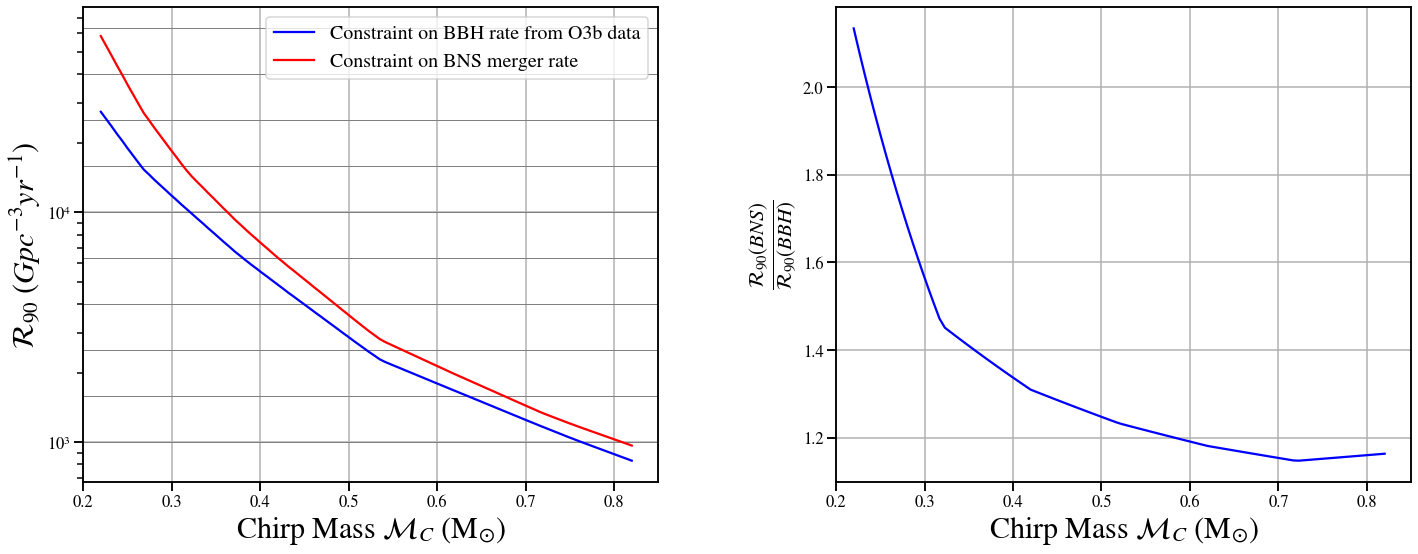

In [6]:
#Read template bank simulations for the BSk21 Equation of State
mass1, mass2,lmd1, lmd2, sim_mass1,sim_mass2,fitting_factor,same_mass_match, f_rlo = np.loadtxt('data_files/BSK21_bns_rlo_data.txt',unpack=True)

#Read rate constraint data for the O3b observing run
chirpmass1,o3b_rate=np.loadtxt('data_files/nonecco3b.txt',unpack=True)

#Constructing Chirp Mass Bins
chirp_mass_2to3=[]
chirp_mass_3to4=[]
chirp_mass_4to5=[]
chirp_mass_5to6=[]
chirp_mass_6to7=[]
chirp_mass_7to8=[]
chirp_mass_8to9=[]
chirp_mass_9to10=[]

match_2to3=[]
match_3to4=[]
match_4to5=[]
match_5to6=[]
match_6to7=[]
match_7to8=[]
match_8to9=[]
match_9to10=[]

mchirp=mchirp_from_mass1_mass2(mass1,mass2)
#print(min(mchirp),max(mchirp))
for i in range(0,len(mchirp)):
    if(mchirp[i]>0.17 and mchirp[i]<0.27):
        chirp_mass_2to3.append(mchirp[i])
        match_2to3.append(fitting_factor[i])    
    elif(mchirp[i]>0.27 and mchirp[i]<0.37):
        chirp_mass_3to4.append(mchirp[i])
        match_3to4.append(fitting_factor[i])
    elif(mchirp[i]>0.37 and mchirp[i]<0.47):
        chirp_mass_4to5.append(mchirp[i])
        match_4to5.append(fitting_factor[i])
    elif(mchirp[i]>0.47 and mchirp[i]<0.57):
        chirp_mass_5to6.append(mchirp[i])
        match_5to6.append(fitting_factor[i])
    elif(mchirp[i]>0.57 and mchirp[i]<0.67):
        chirp_mass_6to7.append(mchirp[i])
        match_6to7.append(fitting_factor[i])
    elif(mchirp[i]>0.67 and mchirp[i]<0.77):
        chirp_mass_7to8.append(mchirp[i])
        match_7to8.append(fitting_factor[i])
    elif(mchirp[i]>0.77 and mchirp[i]<0.87):
        chirp_mass_8to9.append(mchirp[i])
        match_8to9.append(fitting_factor[i])
        
#Average over mass ratio
average_2to3=np.average(match_2to3)
average_3to4=np.average(match_3to4)
average_4to5=np.average(match_4to5)
average_5to6=np.average(match_5to6)
average_6to7=np.average(match_6to7)
average_7to8=np.average(match_7to8)
average_8to9=np.average(match_8to9)
chirpmass=[0.22,0.32,0.42,0.52,0.62,0.72,0.82]
average=[average_2to3,average_3to4,average_4to5,average_5to6,average_6to7,average_7to8,average_8to9]

#Creating 1d Interpolating Functions for the rate Constraints
match_function=interp1d(chirpmass,average,kind='linear')
m_chirp=np.linspace(0.22,0.82,100)
rate_function=interp1d(chirpmass1,o3b_rate,kind='linear')
bbh_rate=rate_function(m_chirp)
avg_ff=match_function(m_chirp)

#Calculating the Rate Constraint for BNS mergers
bns_rate=[]

for i in range(0,len(bbh_rate)):
    bns_rate.append(bbh_rate[i]/(avg_ff[i])**3)

#Calculating the ratio of rates of BNS to BBH mergers    
bns_over_bbh=[]
for i in range(0,len(bbh_rate)):
    bns_over_bbh.append(bns_rate[i]/bbh_rate[i])


#Plotting Figure 6 from the paper    
rcParams['figure.figsize']=(22,10)
fig,(ax1,ax2)=plt.subplots(1,2)
a=3
for i in range(0,10):
    ax1.axhline(10**a,linewidth=1,color='grey')
    a+=0.2
ax1.plot(m_chirp,bbh_rate,label="Constraint on BBH rate from O3b data",color='blue')      
ax1.plot(m_chirp,bns_rate,label="Constraint on BNS merger rate",color='red')
ax1.set_yscale('log')   
ax1.set_xlabel(r'Chirp Mass $\mathcal{M}_C$ (M$_{\odot}$)',fontsize=30)
ax1.set_ylabel(r'$\mathcal{R}_{90}$ $(Gpc^{-3} yr^{-1})$',fontsize=30)
ax1.set_xlim(0.2,0.85)
ax1.legend(fontsize=20,loc='upper right')
ax1.grid()

ax2.plot(m_chirp,bns_over_bbh,color='blue')       
ax2.set_xlabel(r'Chirp Mass $\mathcal{M}_C$ (M$_{\odot}$)',fontsize=30)
ax2.set_ylabel(r'$\frac{\mathcal{R}_{90} (BNS)}{\mathcal{R}_{90} (BBH)}$',fontsize=30)
ax2.set_xlim(0.2,0.85)
ax2.grid()
fig.tight_layout(pad=5.0)
plt.show()
fig.savefig("Plots/Rate_and_Ratio.png")